Introdução ao Projeto de Ciência de Dados: Construindo um Modelo de Regressão para Marketing

Contexto do Desafio

Empresas que investem em publicidade online buscam maximizar o retorno de vendas gerado por seus gastos em plataformas como YouTube, Facebook e jornais. Este projeto surge da necessidade de compreender a relação entre os investimentos em publicidade e os retornos de vendas, identificando os principais fatores que impactam na geração de leads. A empresa almeja, ainda, a criação de um modelo de predição capaz de estimar o retorno de vendas com base nos investimentos em publicidade.

Sobre os Dados

O dataset disponibilizado contém informações detalhadas sobre os investimentos realizados em publicidade nas plataformas mencionadas (YouTube, Facebook e jornais) e os valores associados às vendas. As variáveis presentes incluem investimentos específicos em cada plataforma e o valor total de vendas.

Como Começar?

Para enfrentar esse desafio, é crucial seguir algumas etapas fundamentais. Primeiramente, importe o dataset e conduza uma análise descritiva para compreender a natureza dos dados. Em seguida, parta para a análise exploratória, utilizando técnicas visuais e estatísticas para identificar padrões, relações e possíveis outliers. Finalmente, construa um modelo de regressão que possa prever o retorno de vendas com base nos investimentos.

Etapas de Desenvolvimento

Etapa 01) Análise Descritiva: Utilize a biblioteca Pandas e ferramentas de visualização para compreender as variáveis e identificar possíveis problemas nos dados.

Etapa 02) Análise Exploratória: Explore mais profundamente os dados, identificando relações e padrões relevantes. Analise a correlação e a distribuição dos dados.

Etapa 03) Modelagem: Construa um modelo de regressão simples utilizando a biblioteca sklearn para prever o retorno de vendas com base nos investimentos.

Etapa 04) Calculando Predição: Aplique o modelo construído para prever o retorno de vendas e avaliar o impacto dos diferentes níveis de investimento em marketing.

In [ ]:
#Importa as principais bibliotecas que poderemos usar ao longo do projeto

%pip install plotly
%pip install cufflinks
%pip install chart-studio

import pandas as pd
import numpy as np
import seaborn as sns
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as po
import plotly.express as px
import matplotlib.pyplot as plt

In [ ]:
#Importa a base e faz uma rápida análise descritiva

base_mkt = pd.read_csv("/content/MKT (1).csv")
base_mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Traz as infos da base_mkt para verificar possíveis valores nulos, identificar os tipos de variáveis em cada coluna e o número de linhas
base_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


  Verificamos que a base tem 171 linhas, nenhum valor nulo em nenhuma coluna e todas dados já estão no tipo float

Iremos manter os tipos de dado como float pois tratam-se de valores de investimento e retorno de vendas, portanto faz sentido que sejam números decimais

In [ ]:
#Importa as primeiras linhas da base
base_mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Plota um boxplot (ou diagrama de caixa) dos dados de invetimento em mídia pelo youtube para visualizarmos a distribuição de valores dessa variável

fig = px.box (base_mkt , x= 'youtube')
fig

 Através do boxplot é possível traçar o perfil dos nossos dados de investimento em mídias do youtube, o que é perceptível facilmente é o alto valor de desvio padrão obtido quando fizemos o **`describe()`** do nosso dataset.

  Pelo boxplot a análise torna-se bem mais visual e portanto é mais fácil de compreender como os investimentos em mídias do youtube variaram ao longo das campanhas de marketing (oscilando entre R$0,84 e R$355,00).

A média é de 178 e o desvio padrão de aproximadamente 102.
O intervalo interquartil (diferença entre o primeiro quartil e o terceiro) é de aproximadamente 171.

A distribuição dos dados é moderadamente dispersa, o que intuitivamente pode ser bem aproveitado quando fizermos uma análise por meio de regressão linear, uma vez que permite visualizar melhor a relação entre as variáveis (isso será verificado quando fizermos o pairplot com youtube no eixo x e sales no eixo y)

In [ ]:
#Plota um boxplot dos dados de invetimento em mídia pelo facebook para visualizarmos a distribuição de valores dessa variável
fig = px.box (base_mkt , x= 'facebook')
fig

Através do boxplot dos valores de investimento em mídias do facebook podemos notar que aqui os dados tem uma dispersão um pouco menor do que os dados de investimento no youtube.

In [ ]:
#Plota um boxplot dos dados de invetimento em mídia pelo newspaper para visualizarmos a distribuição de valores dessa variável
fig = px.box (base_mkt , x= 'newspaper')
fig

Os dados de investimento em newsletter apresentam uma distribuição bem diferente dos dados de investimento nas outras mídias pagas, com uma média de 35, desvio padrão de 24, q3 de 50 e valor máximo de 121, indicando uma distribuição muito mais variada, mas que pode tambpem significar a existência de um outlier (algo que pode interferir na precisão do nosso modelo de regressão).

Ademais, a distribuição desses dados parece baixa, pois a maioria dos dados de investimento em newspaper estão concentrados na faixa de 13,47 até 51,24. Um intervalo interquartil de 37,77 para uma std de 24,9

Podemos ir além em nossa análise e identificar se há muitos valores de newspaperr que estejam muito fora do padrão. Para isso, podemos assumir que a distribuição de investimentos em newspaper segue uma dsitribuição normal e então podemos aplicar a regra empírica da distribuição normal, que descreve que que a maior parte (99,7%) dos dados estão dentro do alcance de média +- 3*std

In [ ]:
mean = base_mkt['newspaper'].mean()
std = base_mkt['newspaper'].std()

# Definindo um limite para outliers (por exemplo, 3 desvios padrão)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Identificando outliers
outliers = base_mkt[(base_mkt['newspaper'] > upper_limit) | (base_mkt['newspaper'] < lower_limit)]

outliers

,youtube,facebook,newspaper,sales
72,355.68,43.56,121.08,28.56


Foi possível identificar que há uma entrada com valores de newspaper que podemos considerar outliers se considerarmos apenas os dados de newspaper, porém essa linha pode conter dados relevantes de investimento para as outras mídias pagas, por isso iremos repetir o cálculo acima para as demais colunas e identificar se a mesma linha é um outlier para os demais dados ou não

In [ ]:
mean = base_mkt['youtube'].mean()
std = base_mkt['youtube'].std()

# Definindo um limite para outliers (por exemplo, 3 desvios padrão)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Identificando outliers
outliers = base_mkt[(base_mkt['youtube'] > upper_limit) | (base_mkt['youtube'] < lower_limit)]

outliers

,youtube,facebook,newspaper,sales


In [ ]:
mean = base_mkt['facebook'].mean()
std = base_mkt['facebook'].std()

# Definindo um limite para outliers (por exemplo, 3 desvios padrão)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Identificando outliers
outliers = base_mkt[(base_mkt['facebook'] > upper_limit) | (base_mkt['facebook'] < lower_limit)]

outliers

,youtube,facebook,newspaper,sales


In [ ]:
mean = base_mkt['sales'].mean()
std = base_mkt['sales'].std()

# Definindo um limite para outliers (por exemplo, 3 desvios padrão)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Identificando outliers
outliers = base_mkt[(base_mkt['sales'] > upper_limit) | (base_mkt['sales'] < lower_limit)]

outliers

,youtube,facebook,newspaper,sales


Foi possível verificar que a linha obtida no cálculo de outliers da coluna de newspaper não é um outlier para as demais variáveis, portanto ela não pode ser simplesmente apagada, não apenas isso, mas também não encontramos nenhum outlier para os dados de facebook, youtube e sales.

Como substituir uma variável legítima não é considerada iuma boa prática, uma opção viável é manter essa linha, sem alterações.

Como não temos contexto geral da situação (por exemplo, não podemos perguntar para alguém da equipe de marketing se esse dado é legítimo) podemos verificar se há algum padrão na soma de investimentos em marketing para todas linhas.

A forma como irei fazer isso é criar uma coluna que contenha a soma de todos investimentos em marketing para aquela linha da `base_mkt`. Em seguida irei analisar a nova coluna e determinar se o nosso possível outlier se encaixa no padrão (caso haja um padrão para o total de investimentos em marketing)

In [ ]:
# Criando uma nova coluna 'total_investments' com a soma das três colunas
base_mkt['total_investments'] = base_mkt['youtube'] + base_mkt['newspaper'] + base_mkt['facebook']

# Exibindo a nova tabela com a coluna adicionada
base_mkt.head()

,youtube,facebook,newspaper,sales,total_investments
0,84.72,19.20,48.96,12.60,152.88
1,351.48,33.96,51.84,25.68,437.28
2,135.48,20.88,46.32,14.28,202.68
3,116.64,1.80,36.00,11.52,154.44
4,318.72,24.00,0.36,20.88,343.08


In [ ]:
#Uma breve análise descritiva da coluna adicionada permite que vejamos se
#a empresa do case segue algum padrão ou valor fixo de investimento total em campanhas de marketing nos 3 canais analisados

base_mkt['total_investments'].describe()

count    171.000000
mean     240.932632
std      112.167551
min       25.680000
25%      146.820000
50%      248.400000
75%      337.740000
max      520.320000
Name: total_investments, dtype: float64

In [ ]:
#Seguindo a análise descritiva dos dados de total_investments podemos plotar um boxplot para visualizar as informações de forma mais simples

fig = px.box (base_mkt , x= 'c')
fig

In [ ]:
#Podemos também verificar se a nova coluna apresenta algum outlier seguindo a Regra Empírica

mean = base_mkt['total_investments'].mean()
std = base_mkt['total_investments'].std()

# Definindo um limite para outliers (por exemplo, 3 desvios padrão)
upper_limit = mean + 3 * std
lower_limit = mean - 3 * std

# Identificando outliers
outliers = base_mkt[(base_mkt['total_investments'] > upper_limit) | (base_mkt['total_investments'] < lower_limit)]

outliers

,youtube,facebook,newspaper,sales,total_investments


Ao adicionar a nova coluna é possível notar que a empresa do case não tem um valor fixo para investimento em marketing nesses 3 canais digitais e também que não pudemos identificar nenhum padrão através da estatística descritiva que valide a ideia de descartar a linha de outlier.

Portanto, **iremos manter a linha que carrega um outlier na coluna de newspapaer**, pois não é possível acusar que se trata de um dado ilegítimo ou que não carregue informações que possam ser relevantes para nossa regressão linear.

Dessa maneira, podemos seguir nossa limpeza dos dados.

A próxima etapa é verificar se há linhas duplicadas dentro do nosso dataset

In [ ]:
# Para isso, uso o método duplicated() seguido do método describe()

base_mkt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
166    False
167    False
168    False
169    False
170    False
Length: 171, dtype: bool

In [ ]:
base_mkt.duplicated().describe()

count       171
unique        1
top       False
freq        171
dtype: object

Verificamos acima que não há valores duplicados.

Sabendo agora que nossos dados são confiáveis e conhecendo bem a distribuição deles, podemos seguir nossa análise de dados partindo para a visualização da interação dos dados entre si. Para isso, usaremos a biblioteca `Seaborn`, que permite rapidamente visualizar como cada variável interage graficamente com as outras através do método `pairplot()`

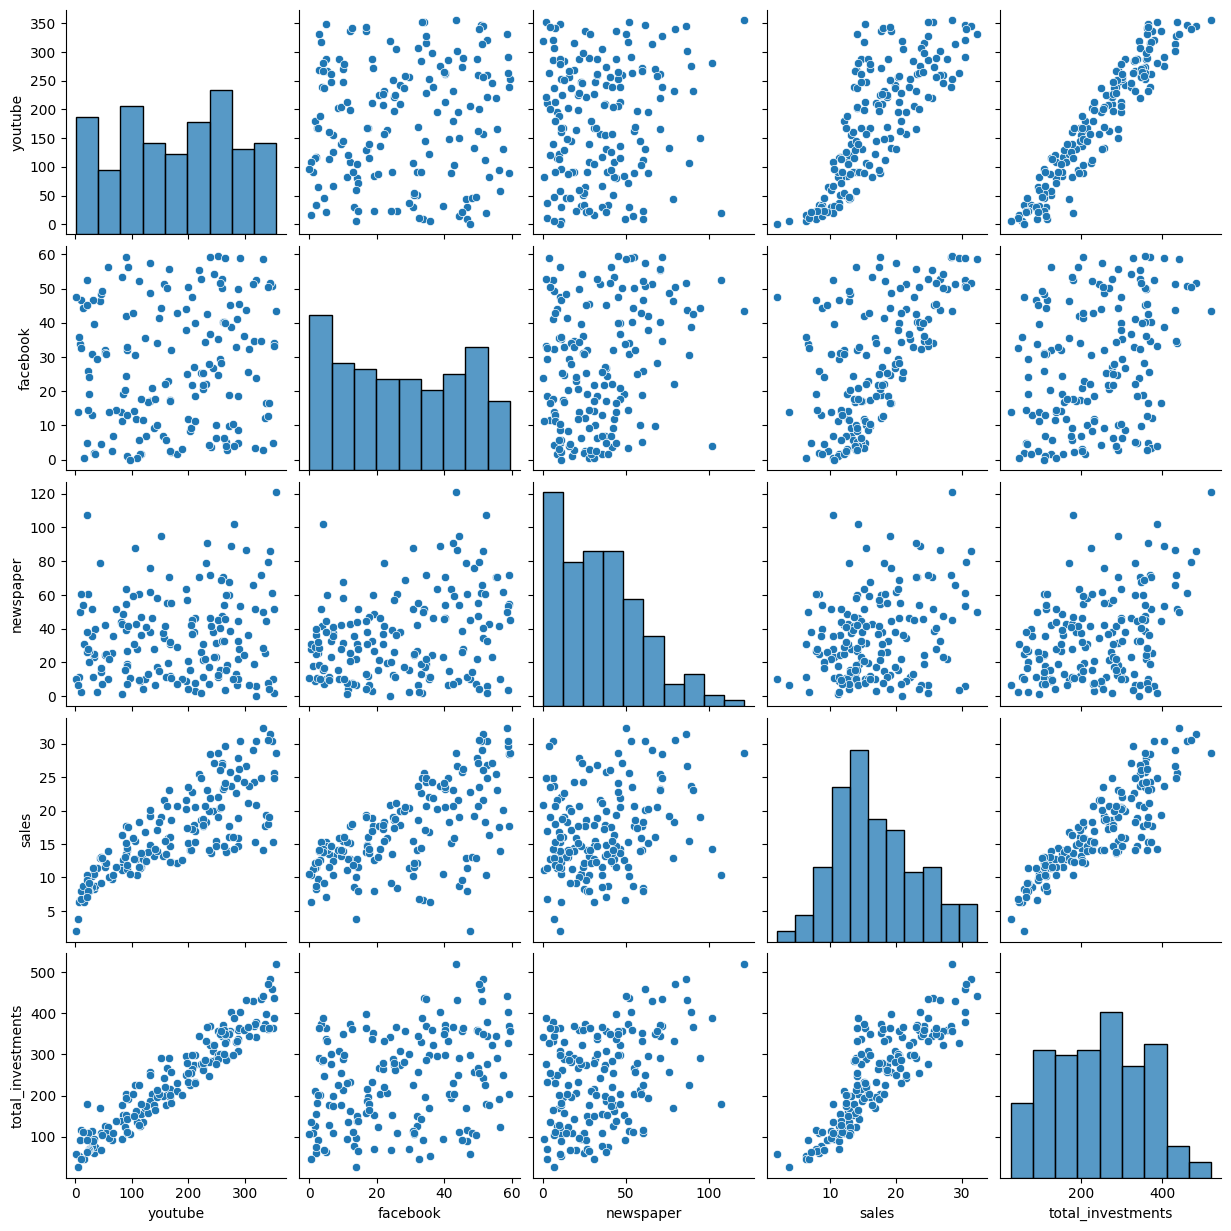

In [ ]:
#Cruza todas colunas entre si (dessa forma é possível visualizr possíveis relações entre os dados)

sns.pairplot(base_mkt)

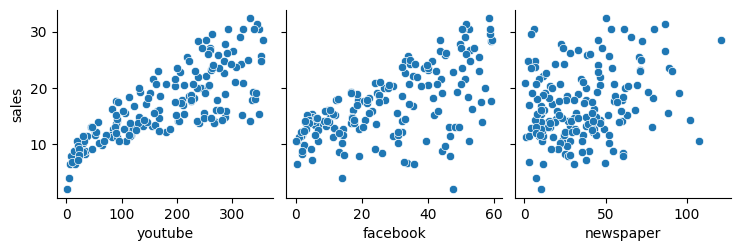

In [ ]:
#Como estudaremos o impacto dos investimentos de marketing nas vendas iremos realizar o pairplot usando os investimentos como variável x
# e manteremos o valor de sales como resultado da função

sns.pairplot (base_mkt , x_vars = ['youtube' , 'facebook', 'newspaper'], y_vars = ['sales'])

Analisando os gráficos obtidos temos as seguintes relações:

* **Dispersão *youtube x sales* :** Há uma relação entre a distribuição dos resultados de sales de acordo com os investimentos em youtube, que é percetível de forma clara. Conforme aumentamos os investimentos em mídias no youtube há uma tendência das vendas melhorarem

* **Dispersão *facebook x sales* :** Há uma relação entre os investimentos em marketing pelo facebook e as vendas, embora não seja tão forte quanto à relação de investimento no youtbe x vendas, mas há uma tendência clara de que se aumentarmos o investimento em marketing pelo facebook provavelmente haverá aumento nas vendas. O recomendado em uma situação real seria investigar mais indicadores que possam estar relacionados ao marketing pelo facebook para traçar um perfil mais claro de impacto nas vendas

* **Dispersão *newspaper x sales* :** A leitura do impacto do investimento em newspapaer nos resultados de vendas não é muito clara. A começar que os dados de newspaper não são tão bem distribuídos como os dados das outras mídias que analisamos, mas ao mesmo tempo também é difícil encontrar um padrão gráfico que correlacione as duas medidas.


Uma forma que temos de tentar encontrar uma correlação gráfica entre os valores de investimento em newspaper e retorno em vendas é utilizar uma regressão linear dentro do prórpio gráfico.

Para isso, usaremos a biblioteca Seaborn novamente.

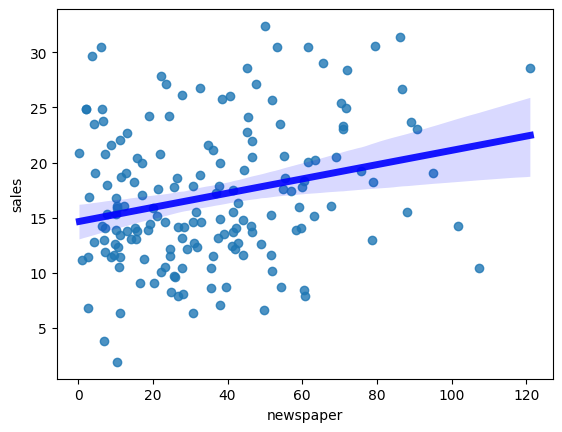

In [ ]:
df = base_mkt

# plota uma dispersão com uma linha de regressão linear entre os pontos dispersos
sns.regplot(x=df["newspaper"], y=df["sales"], line_kws={"color":"b","alpha":0.9,"lw":5})
plt.show()

Dessa forma é notável que há alguma correlação entre os valores de newspaper e os retornos de sales, embora ainda seja notável que a linha de regressão linear não tenha uma precisão muito grande.

Uma possível explicação para esse resultado é que a correlação entre newspaper e sales é fraca, seja porque o impacto das outras variáveis em sales é muito maior ("ofuscando" os resultados que newspaper traz), ou há outras variáveis relacionadas a newspaper que também sejam necessárias para traçar um padrão mais robusto ou simplesmente newspaper tem correlação nenhuma ou muito baixa com os resultados de sales.

Essas são apenas algumas das hipóteses que podem ser levantadas para explicar os resultados obtidos, porém é necessário um aprofundamento maior no tema antes de tirar alguma conclusão absoluta.

------------

Aproveitando a ocasião, também iremos plotar as regressões lineares específicas dos gráficos de *`youtube x sales`* e `*facebook x sales*`


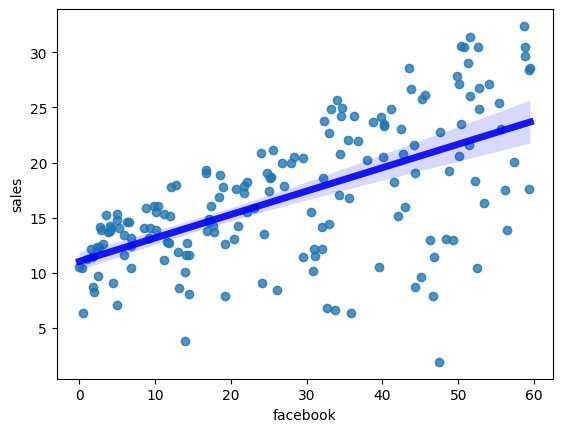

In [ ]:
# plota uma dispersão com uma linha de regressão linear entre os pontos dispersos para FACEBOOK X SALES
sns.regplot(x=df["facebook"], y=df["sales"], line_kws={"color":"b","alpha":0.9,"lw":5})
plt.show()

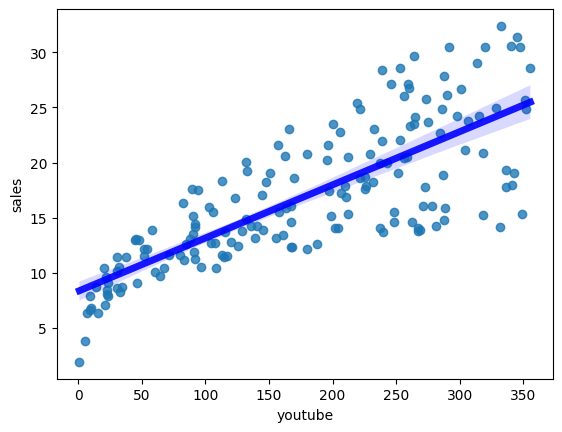

In [ ]:
# plota uma dispersão com uma linha de regressão linear entre os pontos dispersos para YOUTUBE X SALES
sns.regplot(x=df["youtube"], y=df["sales"], line_kws={"color":"b","alpha":0.9,"lw":5})
plt.show()

Traçando as linhas de regressão linear, a correlação entre os investimentos em mídias no youtube e no facebook com as vendas deixam de ser uma afirmação intuitiva e passam a ter um embasamento teórico, o que é muito mais sólido para se levar em uma apresentação ou relatório, por exemplo.

Agora que temos um bom conhecimento dos dados, podemos seguir para a modelagem de dados

In [ ]:
# Primeiro definimos as variáveis X e Y do nosso problema
# Nesse caso, usaremos os dados das colunas youtube, facebook e newspapaper no eixo X e os dados de sales como Y

X = base_mkt[['facebook', 'youtube', 'newspaper']]

Y= base_mkt[['sales']]

In [ ]:
#Importamos a sklearn para começarmos a treinar nosso modelo

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Definiremos os nossos dados que usaremos como para treinar o modelo e quais dados iremos usar para testar nosso modelo
# Como convenção, usaremos 70% do nosso dataset para treinar o moodelo e os demais 30% do dataset para testá-lo

X_train, X_test, Y_train, Y_test = train_test_split (X,Y, train_size=0.7, test_size=0.3, random_state = 42)

# Abaixo mostramos os "tamanhos" das nossas bases de treino e teste (por exemplo, verificaremos que
# as bases de treino no eixo X terá 119 linhas e 3 colunas, pois ela é composta pelas colunas youtube, facebook e newspaper e tem 70% das linhas totais (70% de 171 é 119, aproximadamente))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
#Agora iremos de fato treinar o modelo para regressão linear

ln = LinearRegression()
ln.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = ln.predict(X_test)

r = r2_score(Y_test, y_pred)

print("r_quadrado =", r)

r_quadrado = 0.882423505618885


Um valor de R^2 como esse indica uma baixa precisão do modelo

Text(0, 0.5, 'Sales estimado vs real')

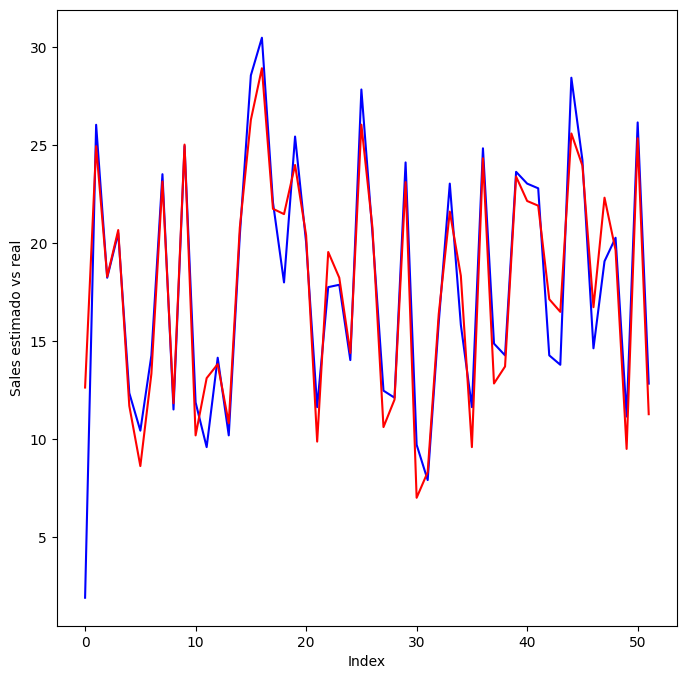

In [ ]:
# Agora que temos nosso valor de y previsto podemos plotar um gráfico que compare o valor previsto através da nossa regressão linear
# Com o valor real de sales registrado para cada linha de nosso dataset

c = [i for i in range (0,52,1)]

fig = plt.figure (figsize =(8,8))

plt.plot ( c, Y_test, color='blue')
plt.plot ( c, y_pred, color = 'red' )

plt.xlabel ('Index')
plt.ylabel ('Sales estimado vs real')

Agora que pudemos verificar que nosso modelo está funcionando e pudemos avaliar graficamente como ele se compara com os dados reais de sales obtidos nós podemos montar um código que pergunta os valores investidos em cada mídia e retorna um valor estimado de retorno em vendas

In [ ]:
# Primeiro perguntamos qual o valor investido em cada mídia

youtube = float(input('Qual o valor investido em marketing pelo Youtube? '))
print('')
facebook = float(input('Qual o valor investido em marketing pelo Facebook? '))
print('')
newspaper = float(input('Qual o valor investido em marketing pelo Newspaper? '))
print('')

# Criando um DataFrame com os valores e as colunas na ordem correta
midias = pd.DataFrame({'facebook': [facebook], 'youtube': [youtube], 'newspaper': [newspaper]})

# Fazendo a previsão usando o modelo (ln)
sales = float(ln.predict(midias))

# Imprimindo o valor estimado de retorno em vendas
print(f'O valor estimado de retorno em vendas é: R$ {sales:.2f}')



Qual o valor investido em marketing pelo Youtube? 120

Qual o valor investido em marketing pelo Facebook? 0

Qual o valor investido em marketing pelo Newspaper? 0

O valor estimado de retorno em vendas é: R$ 9.09
